In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.6f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# armamos el df de crypto_data.csv
crypto_data = {
        'Name': ['Bitcoin','Ethereum','Binance Coin','Cardano','Tether','XRP','Solana','Polkadot','USD Coin','Dogecoin','Terra','Uniswap','Binance USD','Avalanche','Litecoin', 'Wrapped Bitcoin', 'SHIBA INU', 'Chainlink', 'Bitcoin Cash', 'Algorand'],
        'Symbol': ['BTC','ETH', 'BNB', 'ADA', 'USDT', 'XRP', 'SOL', 'DOT', 'USDC', 'DOGE', 'LUNA', 'UNI', 'BUSD', 'AVAX', 'LTC', 'WBTC', 'SHIB', 'LINK', 'BCH', 'ALGO'],
        'Current_Price': ['$56,160.84','$3,485.43','$437.76','$2.12','$1.00','$1.10','$149.54','$34.92','$1.00','$0.2253','$37.64','$23.28','$1.00','$54.00','$171.72', '$56,088.17', '$0.00002935', '$24.53', '$586.43', '$1.72'],
        '7days_Change': [9.00, -1.09, -0.84, -5.13, 0.04, 2.62, -8.87, 11.07, 0.08, -10.33, -16.44, -9.39, 0.11, -17.01, -1.18, 9.22, 82.67, -9.57, -1.39, -11.54],
        'Marketcap': ['$1,058,181,662,284','$411,742,615,450','$73,880,956,395','$70,102,593,193','$68,726,957,084','$51,542,270,865','$44,771,948,363','$34,575,956,836','$33,117,113,540','$29,693,954,570','$15,308,764,099','$14,304,281,999','$13,186,702,245','$11,856,915,772','$11,835,224,016','$11,781,808,366','$11,610,287,430','$11,281,365,572','$11,108,909,720','$10,637,531,194'],
}

df_crypto_data = pd.DataFrame(crypto_data, columns = crypto_data.keys())

In [ ]:
df_crypto_data

,Name,Symbol,Current_Price,7days_Change,Marketcap
0,Bitcoin,BTC,"$56,160.84",9.000000,"$1,058,181,662,284"
1,Ethereum,ETH,"$3,485.43",-1.090000,"$411,742,615,450"
2,Binance Coin,BNB,$437.76,-0.840000,"$73,880,956,395"
3,Cardano,ADA,$2.12,-5.130000,"$70,102,593,193"
4,Tether,USDT,$1.00,0.040000,"$68,726,957,084"
5,XRP,XRP,$1.10,2.620000,"$51,542,270,865"
6,Solana,SOL,$149.54,-8.870000,"$44,771,948,363"
7,Polkadot,DOT,$34.92,11.070000,"$34,575,956,836"
8,USD Coin,USDC,$1.00,0.080000,"$33,117,113,540"
9,Dogecoin,DOGE,$0.2253,-10.330000,"$29,693,954,570"


In [ ]:
df_crypto_data.dtypes

Name              object
Symbol            object
Current_Price     object
7days_Change     float64
Marketcap         object
dtype: object

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [ ]:
df_crypto_data['Marketcap_float'] = df_crypto_data.Marketcap.apply(lambda x: locale.atof(x[1:]))
df_crypto_data

,Name,Symbol,Current_Price,7days_Change,Marketcap,Marketcap_float
0,Bitcoin,BTC,"$56,160.84",9.000000,"$1,058,181,662,284","1,058,181,662,284.000000"
1,Ethereum,ETH,"$3,485.43",-1.090000,"$411,742,615,450","411,742,615,450.000000"
2,Binance Coin,BNB,$437.76,-0.840000,"$73,880,956,395","73,880,956,395.000000"
3,Cardano,ADA,$2.12,-5.130000,"$70,102,593,193","70,102,593,193.000000"
4,Tether,USDT,$1.00,0.040000,"$68,726,957,084","68,726,957,084.000000"
5,XRP,XRP,$1.10,2.620000,"$51,542,270,865","51,542,270,865.000000"
6,Solana,SOL,$149.54,-8.870000,"$44,771,948,363","44,771,948,363.000000"
7,Polkadot,DOT,$34.92,11.070000,"$34,575,956,836","34,575,956,836.000000"
8,USD Coin,USDC,$1.00,0.080000,"$33,117,113,540","33,117,113,540.000000"
9,Dogecoin,DOGE,$0.2253,-10.330000,"$29,693,954,570","29,693,954,570.000000"


In [ ]:
df_crypto_data['Current_Price_float'] = df_crypto_data.Current_Price.apply(lambda x: locale.atof(x[1:]))
df_crypto_data

,Name,Symbol,Current_Price,7days_Change,Marketcap,Marketcap_float,Current_Price_float
0,Bitcoin,BTC,"$56,160.84",9.000000,"$1,058,181,662,284","1,058,181,662,284.000000","56,160.840000"
1,Ethereum,ETH,"$3,485.43",-1.090000,"$411,742,615,450","411,742,615,450.000000","3,485.430000"
2,Binance Coin,BNB,$437.76,-0.840000,"$73,880,956,395","73,880,956,395.000000",437.760000
3,Cardano,ADA,$2.12,-5.130000,"$70,102,593,193","70,102,593,193.000000",2.120000
4,Tether,USDT,$1.00,0.040000,"$68,726,957,084","68,726,957,084.000000",1.000000
5,XRP,XRP,$1.10,2.620000,"$51,542,270,865","51,542,270,865.000000",1.100000
6,Solana,SOL,$149.54,-8.870000,"$44,771,948,363","44,771,948,363.000000",149.540000
7,Polkadot,DOT,$34.92,11.070000,"$34,575,956,836","34,575,956,836.000000",34.920000
8,USD Coin,USDC,$1.00,0.080000,"$33,117,113,540","33,117,113,540.000000",1.000000
9,Dogecoin,DOGE,$0.2253,-10.330000,"$29,693,954,570","29,693,954,570.000000",0.225300


In [ ]:
cryptos = df_crypto_data.loc[df_crypto_data['Current_Price_float'] != 1]
cryptos

,Name,Symbol,Current_Price,7days_Change,Marketcap,Marketcap_float,Current_Price_float
0,Bitcoin,BTC,"$56,160.84",9.000000,"$1,058,181,662,284","1,058,181,662,284.000000","56,160.840000"
1,Ethereum,ETH,"$3,485.43",-1.090000,"$411,742,615,450","411,742,615,450.000000","3,485.430000"
2,Binance Coin,BNB,$437.76,-0.840000,"$73,880,956,395","73,880,956,395.000000",437.760000
3,Cardano,ADA,$2.12,-5.130000,"$70,102,593,193","70,102,593,193.000000",2.120000
5,XRP,XRP,$1.10,2.620000,"$51,542,270,865","51,542,270,865.000000",1.100000
6,Solana,SOL,$149.54,-8.870000,"$44,771,948,363","44,771,948,363.000000",149.540000
7,Polkadot,DOT,$34.92,11.070000,"$34,575,956,836","34,575,956,836.000000",34.920000
9,Dogecoin,DOGE,$0.2253,-10.330000,"$29,693,954,570","29,693,954,570.000000",0.225300
10,Terra,LUNA,$37.64,-16.440000,"$15,308,764,099","15,308,764,099.000000",37.640000
11,Uniswap,UNI,$23.28,-9.390000,"$14,304,281,999","14,304,281,999.000000",23.280000


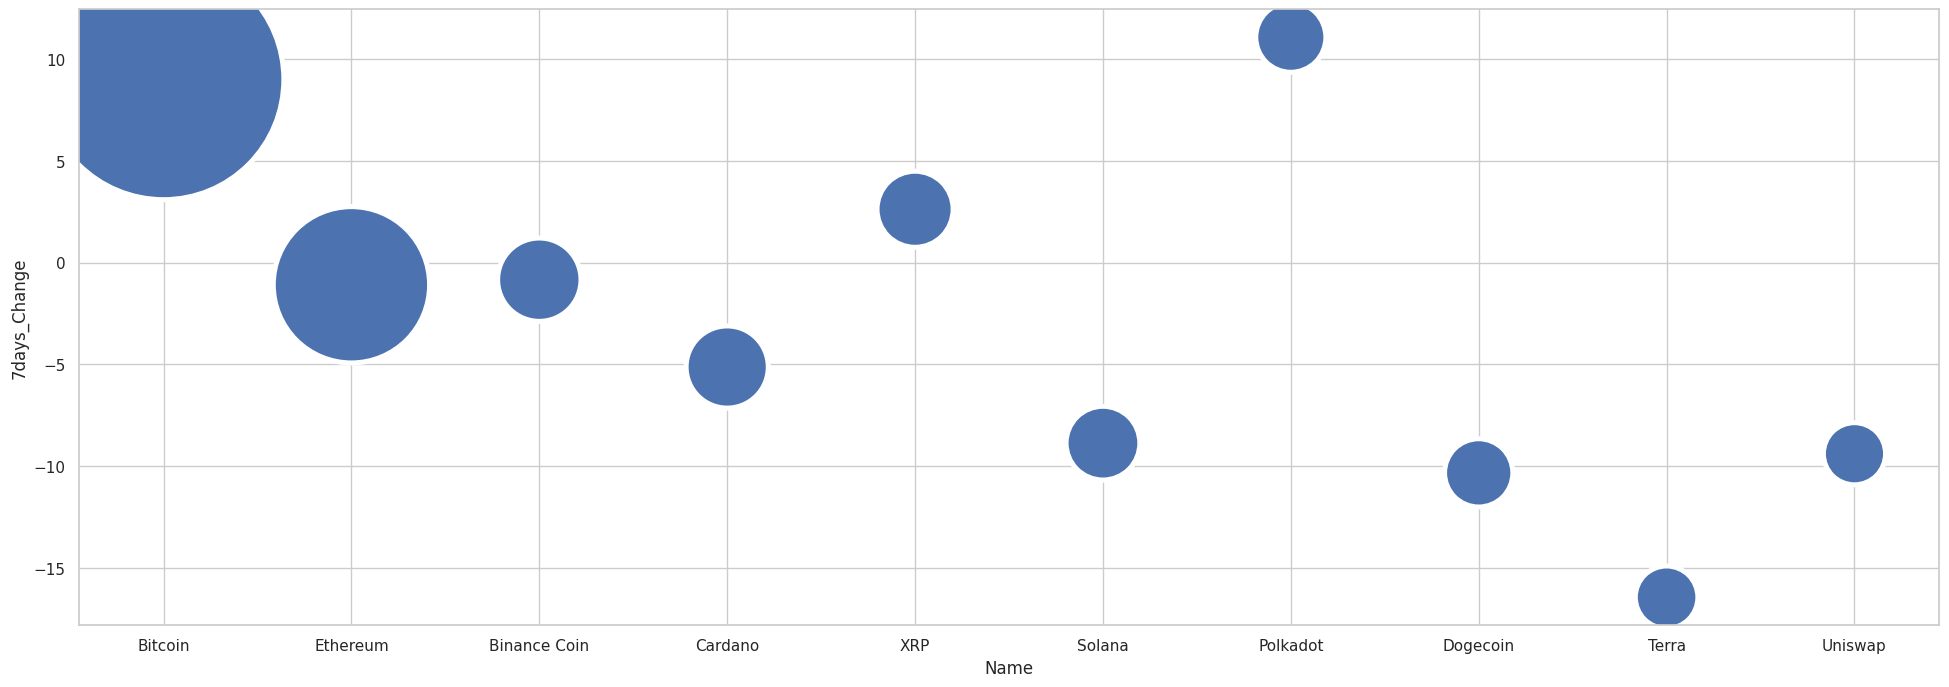

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [24, 8]

data = cryptos.head(10)
 
sns.scatterplot(data=data, x="Name", y="7days_Change", size="Marketcap_float", legend=False, sizes=(2000, 30000))

plt.show()

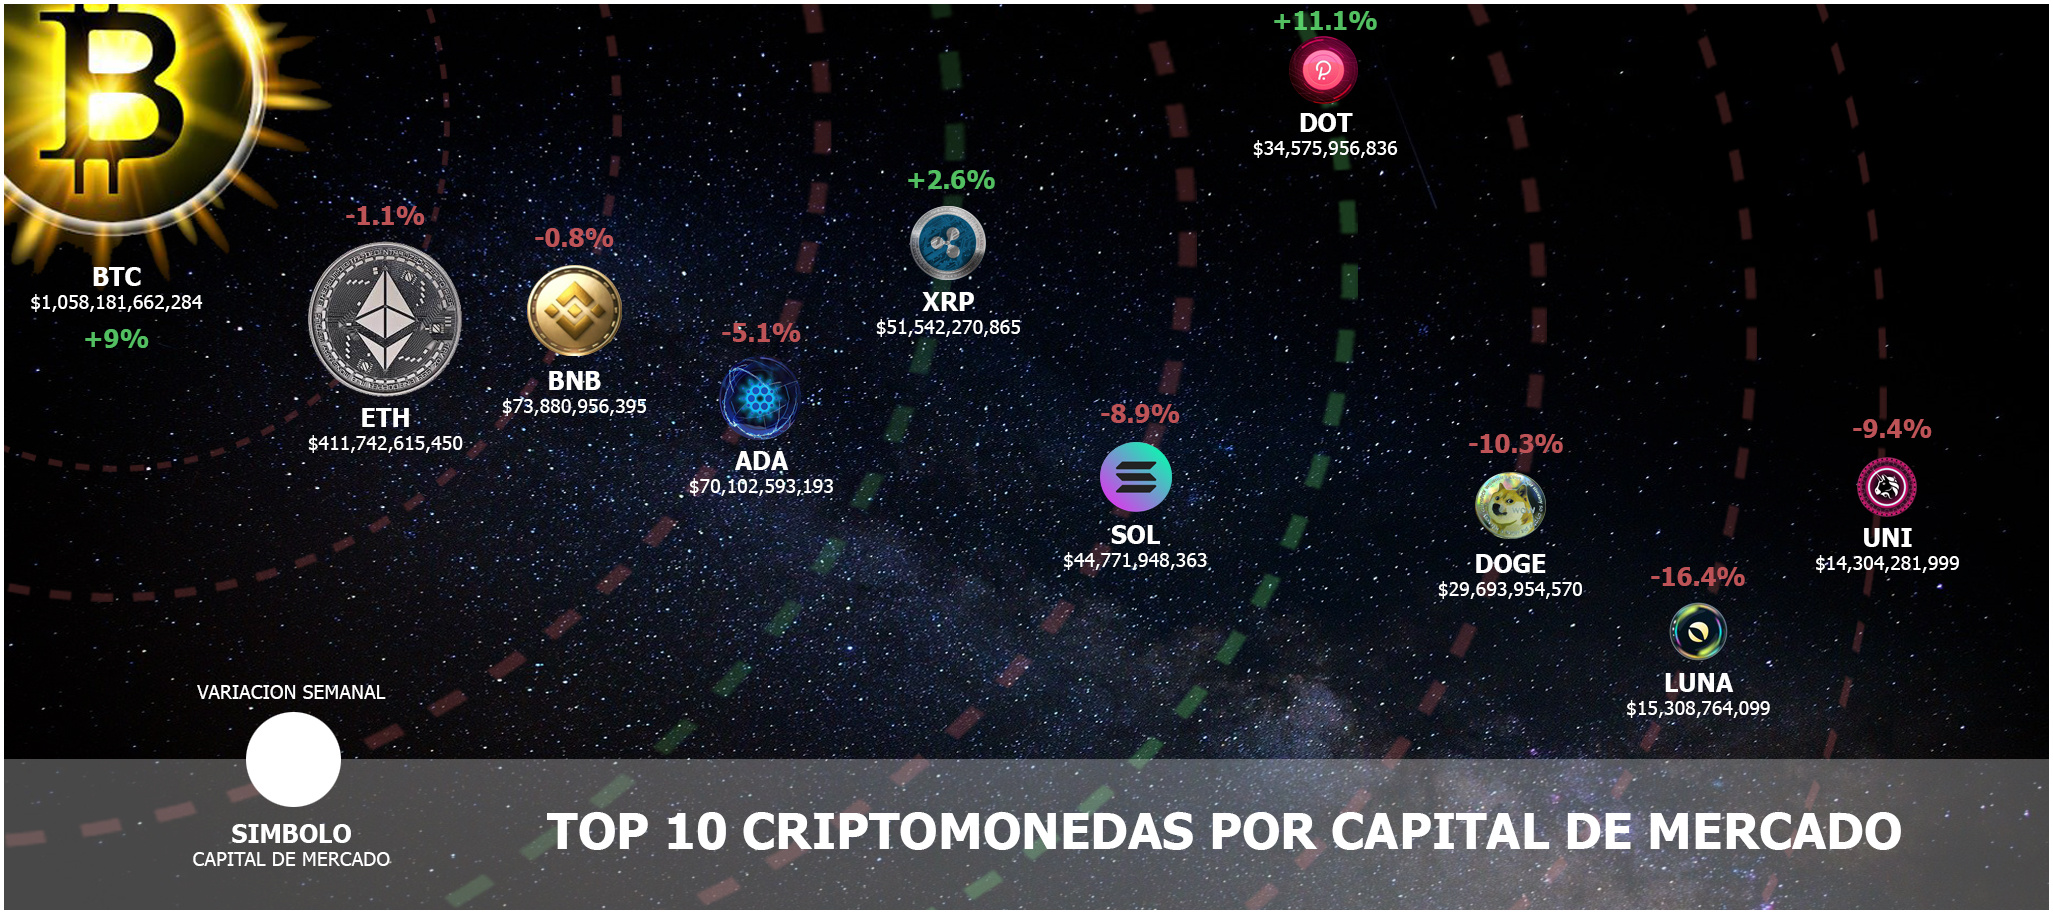